1. Se cargan los datos del archivo CSV y se guarda en un DataFrame:

In [98]:
import pandas as pd

data= pd.read_csv('/content/bank.csv')
data_copy = data.copy()
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,blue-collar,married,secondary,no,314,yes,yes,unknown,16,may,269,2,-1,0,unknown,no
8996,32,blue-collar,married,secondary,no,491,yes,no,unknown,8,may,223,2,-1,0,unknown,no
8997,44,services,single,secondary,no,2886,no,no,unknown,20,jun,31,1,-1,0,unknown,no
8998,57,services,married,primary,no,491,yes,no,cellular,15,apr,1217,3,-1,0,unknown,yes


-----------

2. Se obtiene información sobre la base de datos (número de registros, total de variables, tipo de cada variable, cantidad de datos perdidos):

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


Se tienen un total de 9000 registros sin ningún dato perdido, con 17 variables donde pueden ser de 2 tipos: entero y objeto.

---------

3. Se transforman las variables categóricas con LabelEncoder:

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

data_copy = data.copy()

for column in data.columns:
  if data_copy[column].dtype  == object: #Si es texto, se usa OrdinalEncoder
    data[column] = OrdinalEncoder().fit_transform(data[[column]])
  
  if data_copy[column].dtype  == np.int64: #Si es numero, se usa MinMaxScaler
    data[column] = MinMaxScaler().fit_transform(data[[column]])

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.168831,6.0,1.0,2.0,0.0,0.067931,0.0,0.0,0.0,0.300000,9.0,0.096923,0.017544,0.115159,0.103448,2.0,1.0
1,0.142857,10.0,2.0,3.0,0.0,0.055090,0.0,0.0,0.0,0.166667,11.0,0.074462,0.000000,0.000000,0.000000,3.0,1.0
2,0.298701,1.0,1.0,1.0,0.0,0.061831,1.0,0.0,0.0,0.533333,9.0,0.112615,0.000000,0.000000,0.000000,3.0,0.0
3,0.415584,1.0,1.0,1.0,0.0,0.037288,1.0,0.0,0.0,0.533333,5.0,0.004615,0.122807,0.000000,0.000000,3.0,0.0
4,0.285714,0.0,1.0,1.0,0.0,0.036292,0.0,0.0,0.0,0.900000,5.0,0.151692,0.017544,0.215041,0.189655,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.311688,1.0,1.0,1.0,0.0,0.040018,1.0,1.0,2.0,0.500000,8.0,0.081846,0.017544,0.000000,0.000000,3.0,0.0
8996,0.181818,1.0,1.0,1.0,0.0,0.042119,1.0,0.0,2.0,0.233333,8.0,0.067692,0.017544,0.000000,0.000000,3.0,0.0
8997,0.337662,7.0,2.0,1.0,0.0,0.070542,0.0,0.0,2.0,0.633333,6.0,0.008615,0.000000,0.000000,0.000000,3.0,0.0
8998,0.506494,7.0,1.0,0.0,0.0,0.042119,1.0,0.0,0.0,0.466667,0.0,0.373538,0.035088,0.000000,0.000000,3.0,1.0


--------------

4. Se revisan las variables numéricas y se procesa cuando presente un sesgo:

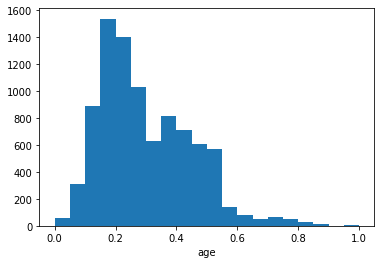

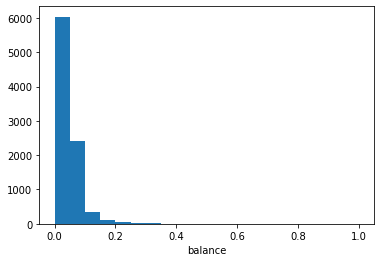

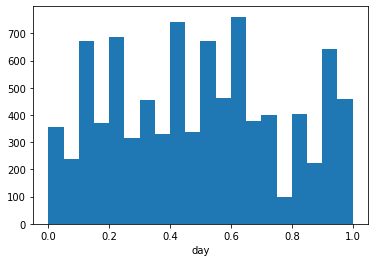

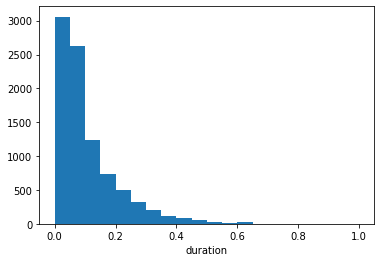

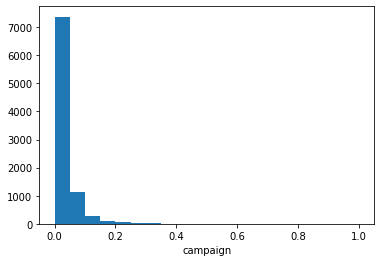

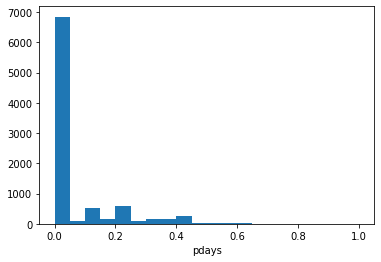

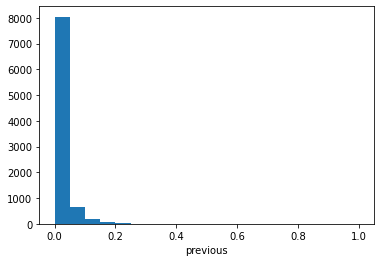

In [101]:
import matplotlib.pyplot as plt

for column in data.columns:  
  if data_copy[column].dtype  == np.int64: #Si es numero, se genera un histograma para revisar si tiene sesgo
    plt.hist(np.array(data[column]), bins = 20)
    plt.xlabel(column)
    plt.show()

Todas presentan sesgo, la mayoría de tipo positiva. Se realiza las transformaciones necesarias. Se utiliza la transformación de la raíz cuadrada:

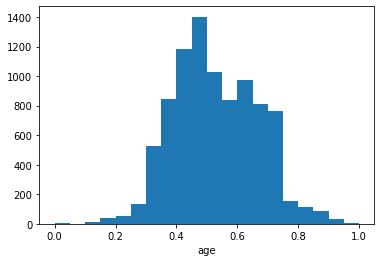

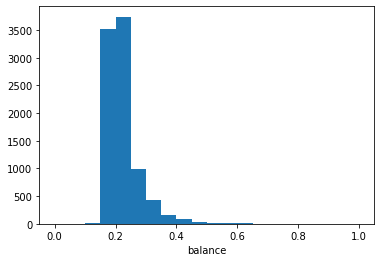

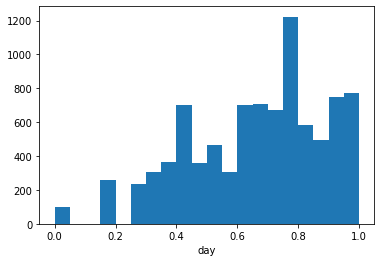

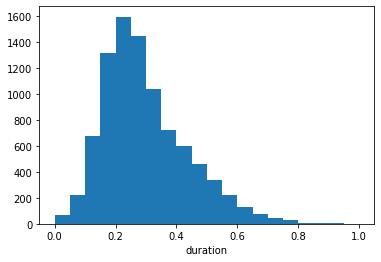

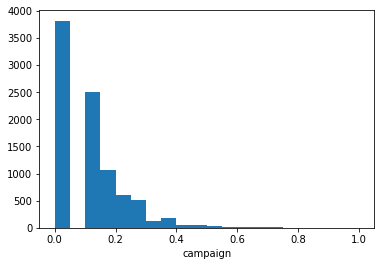

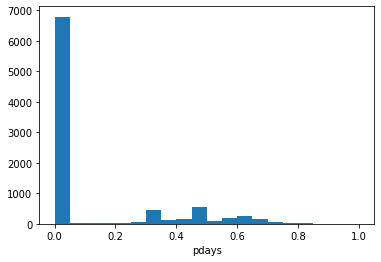

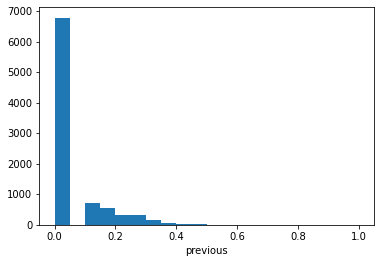

In [102]:
for column in data.columns:
  if data_copy[column].dtype == np.int64: #Si es numero, se genera un histograma para revisar si tiene sesgo
    aux = np.sqrt(np.array(data[column]))
    plt.hist(aux, bins = 20 )
    plt.xlabel(column)
    plt.show()

    data[column] = pd.Series(aux) 

----------

5. Se particiona los datos en los conjuntos de entrenamiento, validación y prueba (60%, 20%, 20%):

In [103]:
from sklearn.model_selection import train_test_split

data_aux = data.copy()
data_aux = data_aux.drop(["y"], axis=1)
data_aux.info()

x = np.array(data_aux)
y = np.array(data["y"])

x_train, x_aux, y_train, y_aux = train_test_split(x, y, train_size=0.6, random_state=11)
x_val, x_test, y_val, y_test = train_test_split(x_aux, y_aux, train_size=0.5, random_state=11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9000 non-null   float64
 1   job        9000 non-null   float64
 2   marital    9000 non-null   float64
 3   education  9000 non-null   float64
 4   default    9000 non-null   float64
 5   balance    9000 non-null   float64
 6   housing    9000 non-null   float64
 7   loan       9000 non-null   float64
 8   contact    9000 non-null   float64
 9   day        9000 non-null   float64
 10  month      9000 non-null   float64
 11  duration   9000 non-null   float64
 12  campaign   9000 non-null   float64
 13  pdays      9000 non-null   float64
 14  previous   9000 non-null   float64
 15  poutcome   9000 non-null   float64
dtypes: float64(16)
memory usage: 1.1 MB


----------

6. Se da un primer acercamiento al modelo Regresión Logística en el conjunto de entrenamiento, validando el modelo con las predicciones del conjunto de validación y su matriz de confusión:

Regresión Logística:
Exactitud (accuracy) con el conjunto de Validación =  0.8011111111111111
0.8157407407407408


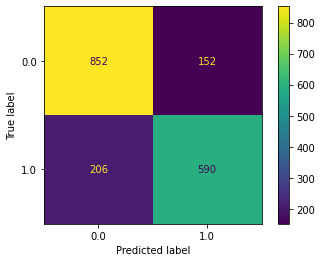

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = LogisticRegression(C=1.0, solver='newton-cg')
modelo_RL = clf.fit(x_train, y_train)

print("Regresión Logística:\nExactitud (accuracy) con el conjunto de Validación = ", modelo_RL.score(x_val, y_val))
print(modelo_RL.score(x_train, y_train))

predictions = clf.predict(x_val)
cm = confusion_matrix(y_val, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

Se buscan otros parámetros del modelo para intentar mejorar el resultado:

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
              'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')}

RL_grid = LogisticRegression(max_iter = 10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(x_train, y_train)

print(modelo_RL_grid)
print("Los mejores resultados valores encontrados son %s con un score de %0.2f" % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))
print(modelo_RL_grid.score(x_val, y_val))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                               0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95,
                               1],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})
Los mejores resultados valores encontrados son {'C': 0.45, 'penalty': 'l1', 'solver': 'liblinear'} con un score de 0.82
0.8


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1045 fits failed out of a total of 2280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [106]:
aux = LogisticRegression(C=0.45, penalty='l1', solver='liblinear')
modelo_aux = aux.fit(x_train, y_train)

print("Regresión Logística:\nExactitud (accuracy) con el conjunto de Validación = ", modelo_aux.score(x_val, y_val))
modelo_aux.score(x_train, y_train)

Regresión Logística:
Exactitud (accuracy) con el conjunto de Validación =  0.8


0.8157407407407408

Pese a que se buscó mejores opciones, no se logró encontrar una. La mejor dentro de la búsqueda tiene una exactitud un poco menor a la que se propuso originalmente **(diferencia de 0.0011)**. Nos quedaremos con la opción propuesta inicialmente como modelo final

Se procede a obtener el desempeño final, junto con su matriz de confusión, utilizando los valores de prueba:

Regresión Logística:
Exactitud (accuracy) con el conjunto de prueba =  0.7727777777777778


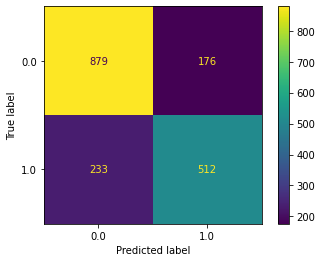

In [111]:
finalRegression = LogisticRegression(C=1.0, solver='newton-cg')
modeloFinalRegression = finalRegression.fit(x_train, y_train)
print("Regresión Logística:\nExactitud (accuracy) con el conjunto de prueba = ", modeloFinalRegression.score(x_test, y_test))

predictions = finalRegression.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=finalRegression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = finalRegression.classes_)
disp.plot()
plt.show()

------

7. Se aplica el modelo Red Neuronal en el conjunto de entrenamiento:

Red neuronal:
Exactitud (accuracy) con el conjunto de Validación =  0.8205555555555556
0.8296296296296296


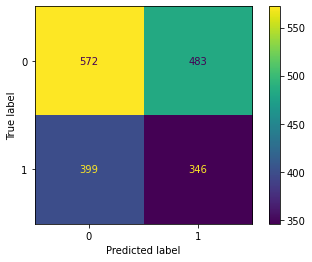

In [112]:
from sklearn.neural_network import MLPClassifier

modelo_NNR = MLPClassifier(hidden_layer_sizes = (10, 4), max_iter = 10000, random_state=42).fit(x_train, y_train)

print("Red neuronal:\nExactitud (accuracy) con el conjunto de Validación = ", modelo_NNR.score(x_val, y_val))
print(modelo_NNR.score(x_train, y_train))

pred = modelo_NNR.predict(x_val)
cm = confusion_matrix(y_test, pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0, 1])
disp.plot()
plt.show()

Se buscan otros parámetros del modelo para intentar mejorar el resultado:

> 1...	 trainacc: 0.816, testacc: 0.775, trainloss: 0.184, testloss: 0.225
> 6...	 trainacc: 0.816, testacc: 0.775, trainloss: 0.184, testloss: 0.225
> 11...	 trainacc: 0.826, testacc: 0.789, trainloss: 0.174, testloss: 0.211
> 16...	 trainacc: 0.830, testacc: 0.794, trainloss: 0.170, testloss: 0.206
> 21...	 trainacc: 0.826, testacc: 0.787, trainloss: 0.174, testloss: 0.213
> 26...	 trainacc: 0.834, testacc: 0.796, trainloss: 0.166, testloss: 0.204
> 31...	 trainacc: 0.839, testacc: 0.795, trainloss: 0.161, testloss: 0.205
> 36...	 trainacc: 0.834, testacc: 0.804, trainloss: 0.166, testloss: 0.196
> 41...	 trainacc: 0.837, testacc: 0.806, trainloss: 0.163, testloss: 0.194
> 46...	 trainacc: 0.840, testacc: 0.797, trainloss: 0.160, testloss: 0.203


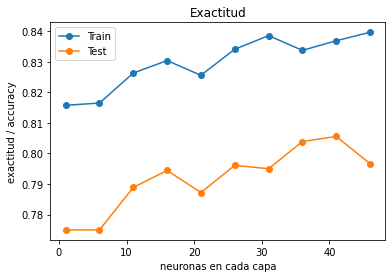

In [113]:
neuronas = [i for i in range(1, 50, 5)]
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:
  modelAux = MLPClassifier(hidden_layer_sizes=(i, i), max_iter=10000, alpha=0.5, random_state=42).fit(x_train, y_train)

  #Conjunto de entrenamiento:
  train_yhat = modelAux.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  #Conjunto de prueba:
  test_yhat = modelAux.predict(x_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)

  #Resumen
  print('> %d...\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))

import matplotlib.pyplot as plt
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud')
plt.xlabel('neuronas en cada capa')
plt.ylabel('exactitud / accuracy')
plt.show()

Se elegirá este modelo con nuevos parámetros **(hidden_layer_sizes = (41, 41), max_iter = 10000, alpha=0.5)**, debido a:

*   La exactitud con los datos de prueba es mayor para 41 neuronas, en comparacion con otra cantidad de neuronas

Se procede a obtener el desempeño final, junto con su matriz de confusión, utilizando los valores de prueba:

Regresión Logística:
Exactitud (accuracy) con el conjunto de prueba =  0.8055555555555556
0.8368518518518518


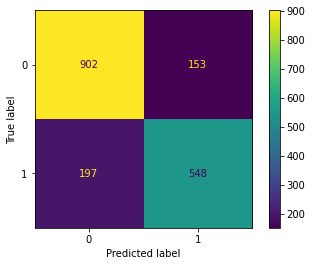

In [114]:
modeloFinal = MLPClassifier(hidden_layer_sizes = (41, 41), max_iter = 10000, alpha=0.5, random_state=42).fit(x_train, y_train)

print("Regresión Logística:\nExactitud (accuracy) con el conjunto de prueba = ", modeloFinal.score(x_test, y_test))
print(modeloFinal.score(x_train, y_train))

pred = modeloFinal.predict(x_test)
cm = confusion_matrix(y_test, pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0, 1])
disp.plot()
plt.show()

------------------

8. Conclusiones. ¿Qué se puede decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

El área de mercadotecnia es una donde fácilmente se puede ver la implementación de la inteligencia artificial. Siendo el problema de predecir resultados una de las más deseadas.

Muchos estudios matemáticos han estado tras la búsqueda de la predicción de datos. Afortunadamente en la época que estamos viviendo, el nivel tecnológico y la automatización que ofrece la inteligencia artificial, podemos alcanzar la cima de este tema.

Nadie se pudiera haber imaginado el obtener modelos de predicción con al menos un 80% de certeza. Para la mercadoctenia, esto es más que oro; saber con gran exactitud que se podrá vender y que no.

Como antiguamente se hacía, muchas pruebas con diferentes consumidores para conocer su reacción y retroalimentación. Con estas nuevas técnicas que reduce todo el proceso y dejarlo únicamente a los datos y a la inteligencia artificial. Se reducen costos y tiempos, no obstante, no se debe confiar plenamente. 

Al final de la historia, hay humanos involucrados y muchas veces, estos lucharán en contra de los datos. Nada está asegurado y siempre puede haber algún cambio.